<a href="https://colab.research.google.com/github/Ruby1517/California-housing-price/blob/main/california_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Price**

### **Details**
About this file
1. **longitude:** A measure of how far west a house is; a higher value is farther west
2. **latitude:** A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('drive/MyDrive/california-housing_price/housing.csv')

In [3]:
data.shape

(20640, 10)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data["total_bedrooms"].fillna(data["total_bedrooms"].mean(), inplace=True)

In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# convert categorical column to numerical with "Encoder"
# from sklearn.preprocessing import LabelEncoder
# lc = LabelEncoder()
# data["ocean_proximity"]=lc.fit_transform(data["ocean_proximity"])
# data.head()


In [11]:
# Convert categorical columns to numerical with get_dummies
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop("ocean_proximity", axis=1)


In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  int64  
 10  INLAND              20640 non-null  int64  
 11  ISLAND              20640 non-null  int64  
 12  NEAR BAY            20640 non-null  int64  
 13  NEAR OCEAN          20640 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

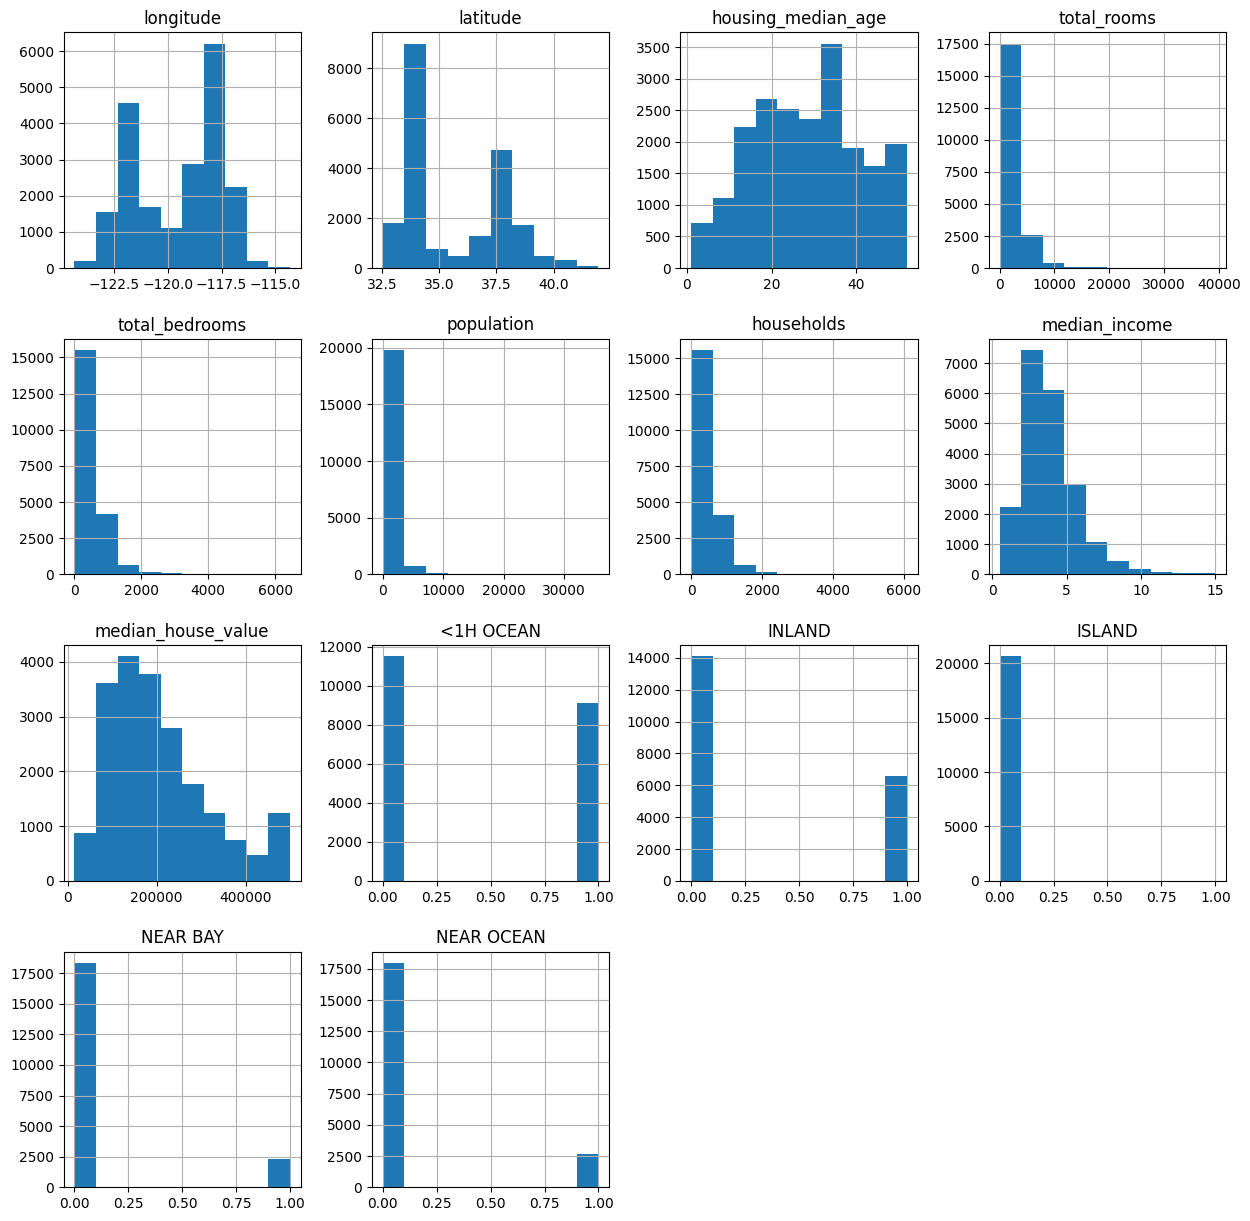

In [14]:
data.hist(figsize=(15, 15))

In [15]:
data["total_bedrooms"]=np.log(data["total_bedrooms"] + 1)
data["total_rooms"]=np.log(data["total_rooms"] + 1)
data["population"]=np.log(data["population"] + 1)
data["households"]=np.log(data["households"] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

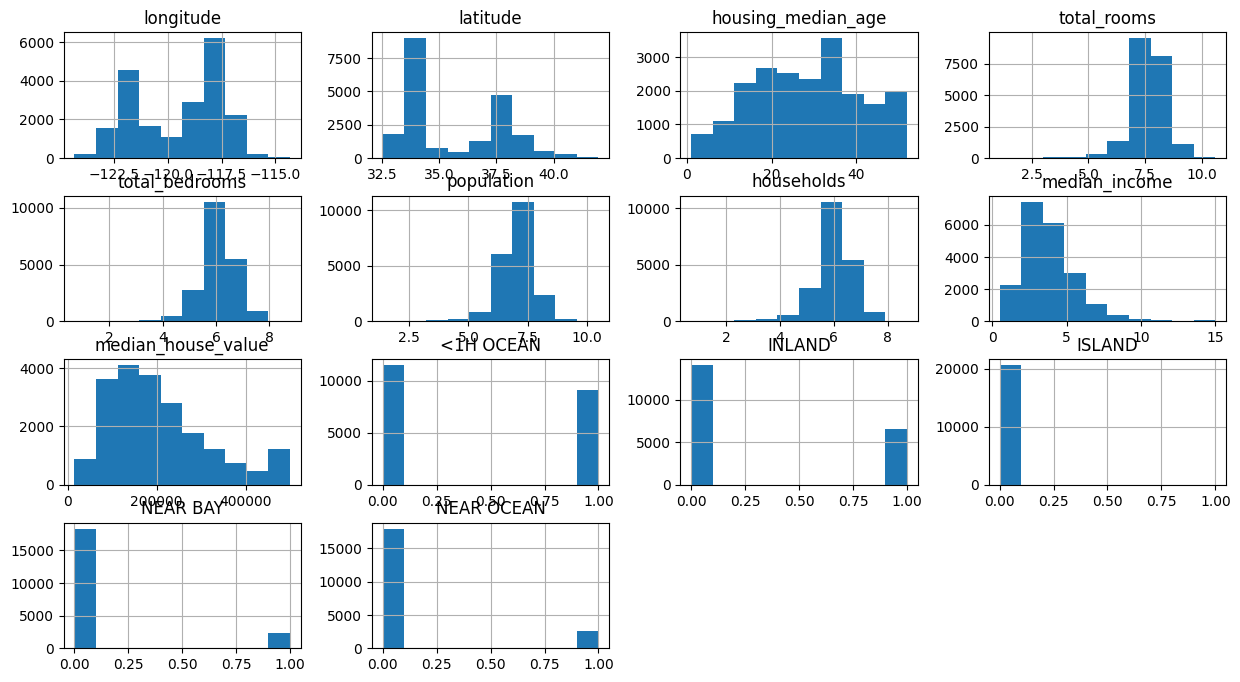

In [16]:
data.hist(figsize=(15, 8))

<Axes: >

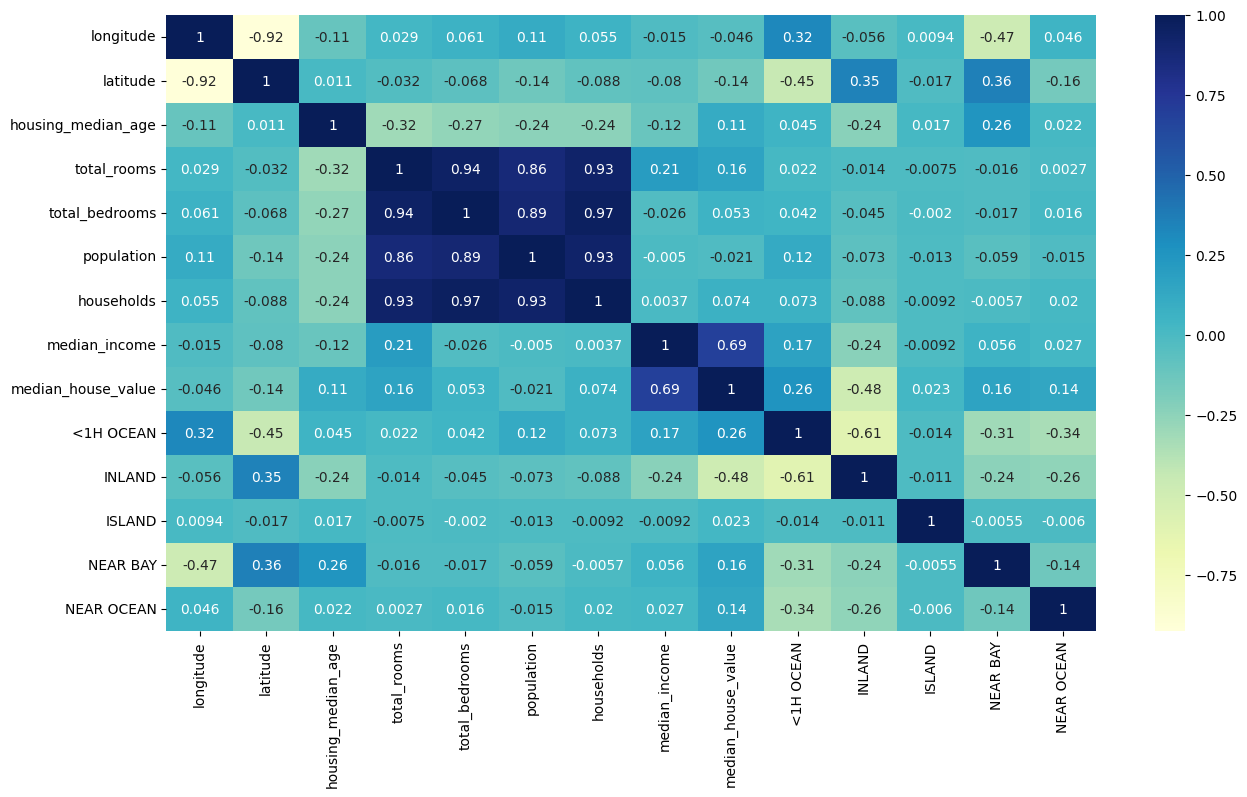

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

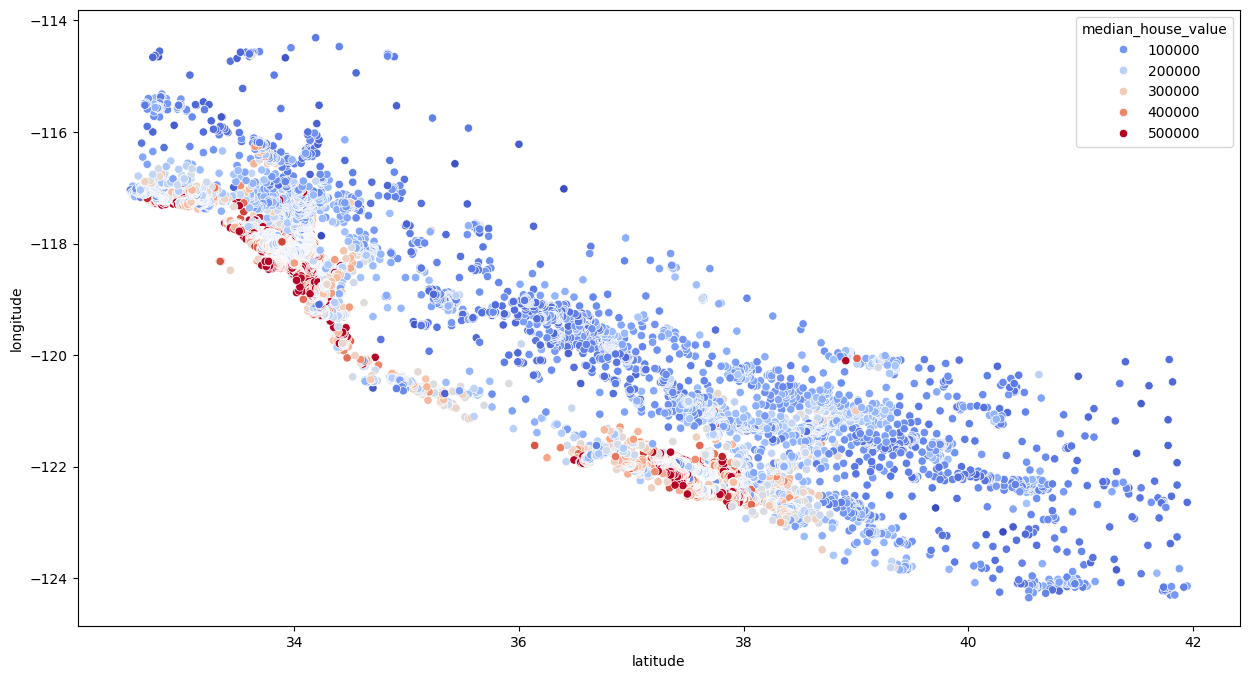

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

In [19]:
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<Axes: >

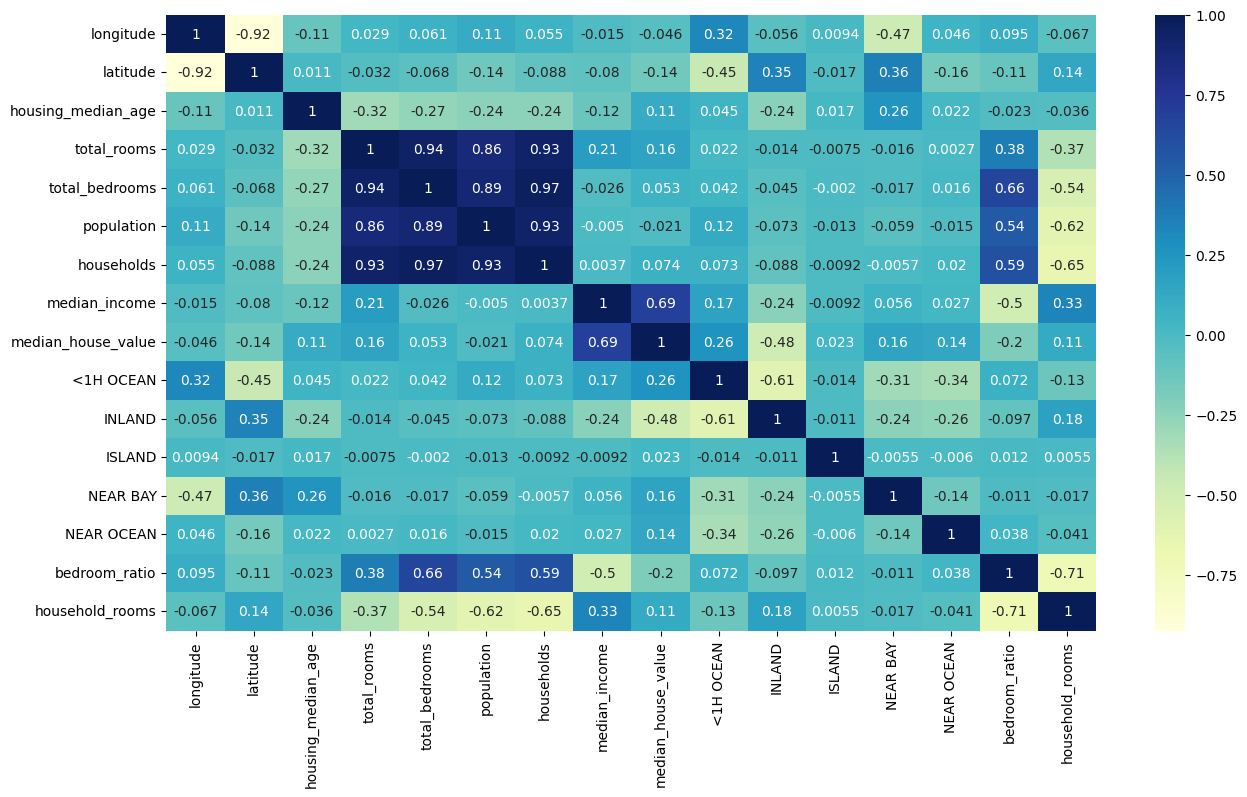

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [21]:
# split the data to train and test data
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((16512, 15), (4128, 15))

In [23]:
y_train.shape, y_test.shape

((16512,), (4128,))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20046,-119.01,36.06,25.0,7.317212,6.289475,7.239215,5.886104,1.6812,0,1,0,0,0,0.859545,1.243133
3024,-119.46,35.14,30.0,7.987524,6.289475,7.356280,6.371612,2.5313,0,1,0,0,0,0.787412,1.253611
15663,-122.44,37.80,52.0,8.250881,6.289475,7.178545,6.871091,3.4801,0,0,0,1,0,0.762279,1.200811
20484,-118.72,34.28,17.0,8.023552,6.289475,7.441907,6.206576,5.7376,1,0,0,0,0,0.783877,1.292750
9814,-121.93,36.62,34.0,7.763021,6.289475,6.969791,6.061457,3.7250,0,0,0,0,1,0.810184,1.280719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,8.060224,6.180017,7.209340,6.115892,4.6050,1,0,0,0,0,0.766730,1.317915
16623,-120.83,35.36,28.0,8.371936,6.787845,7.409136,6.559615,2.7266,0,0,0,0,1,0.810786,1.276285
18086,-122.05,37.31,25.0,8.321665,6.289716,7.368970,6.343880,9.2298,1,0,0,0,0,0.755824,1.311763
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,0,1,0,0,0,0.785249,1.269973


In [34]:
reg.score(X_test, y_test)

0.634765024581671

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
rf.score(X_test, y_test)

0.8071877656216927

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 30, 50],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 4, 6],
    "max_features": [8, 12, 20]
}

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 30, 50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_forest = grid_search.best_estimator_

In [33]:
best_forest.score(X_test, y_test)

0.8084624816329554